In [7]:
# load dataset
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train=x_train.reshape(x_train.shape[0], -1)
x_test=x_test.reshape(x_test.shape[0], -1)

## Performance of TnT

This code takes ~5 mins to run. To reduce runtime, use greater ccp_alpha values (1e-3/1e-2).

Console should print the following results:

    TnT accuracy (train set): 0.9591
    TnT accuracy (test set): 0.9037
    TnT model complexity:  1019  internal nodes,  635  leaf nodes

In [7]:
from TreeInTree import TnT
from sklearn.metrics import accuracy_score
tnt = TnT(N1=2, N2=5, ccp_alpha=1e-4, random_state=0)
tnt.fit(x_train, y_train)
prediction_train = tnt.predict(teX=x_train)
accuracy_train = accuracy_score(y_train, prediction_train)
print("TnT accuracy (train set):", accuracy_train)
prediction_test = tnt.predict(teX=x_test)
accuracy_test = accuracy_score(y_test, prediction_test)
print("TnT accuracy (test set):", accuracy_test)
i, l = tnt.check_complexity()
print("TnT model complexity: ", i, " internal nodes, ", l, " leaf nodes")

TnT accuracy (train set): 0.9611166666666666
TnT accuracy (test set): 0.9063
TnT model complexity:  1020  internal nodes,  619  leaf nodes


## Visualization of TnT

Visualize TnT as a directed graph using "sknetwork". To install sknetwork, run

    $ pip install scikit-network

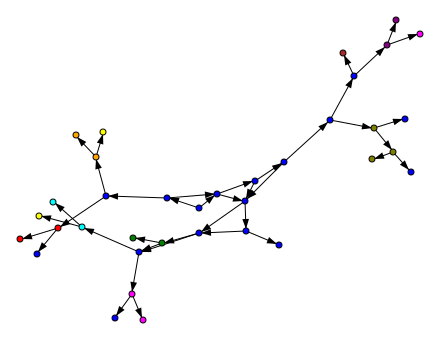

In [8]:
# load pretrained model
import pickle
with open("model/MNIST_ccp_1e-2.pkl",'rb') as infile:
    file = pickle.load(infile)
tnt, X, y = file['model'], x_train, y_train

# visualize TnT
from IPython.display import SVG
from TreeInTree import visTnT
image = visTnT(tnt, X, y, scale=1, edge_width=1, node_size=3)
SVG(image)

##  Performance of CART 

Console should print the following results:

    CART accuracy (train set): 0.9357
    CART accuracy (test set): 0.883
    CART model complexity:  1019  internal nodes,  1020  leaf nodes


In [4]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_leaf_nodes=i+1, random_state=0)
cart.fit(x_train, y_train)
prediction_train = cart.predict(x_train)
accuracy_train = accuracy_score(y_train, prediction_train)
print("CART accuracy (train set):", accuracy_train)
prediction_test = cart.predict(x_test)
accuracy_test = accuracy_score(y_test, prediction_test)
print("CART accuracy (test set):", accuracy_test)
print("CART model complexity: ", i, " internal nodes, ", i+1, " leaf nodes")

CART accuracy (train set): 0.6468
CART accuracy (test set): 0.6512
CART model complexity:  20  internal nodes,  21  leaf nodes


##  Performance of TnT ensemble 

Console should print the following results:

    TnT-bagging accuracy (test set): 0.9037
    TnT-bagging model complexity:  11022  internal nodes,  7270  leaf nodes

In [11]:
from sklearn.ensemble import BaggingClassifier
tnt_bagging = BaggingClassifier(base_estimator=TnT(N1=2, N2=5, ccp_alpha=1e-4), n_estimators=10,n_jobs=-1,random_state=0)
tnt_bagging.fit(x_train, y_train)
prediction_test = tnt_bagging.predict(x_test)
accuracy_test = accuracy_score(y_test, prediction_test)
print("TnT-bagging accuracy (test set):", accuracy_test)

i, l = 0, 0
for tee in range(len(tnt_bagging.estimators_)):
    i_temp, l_temp = tnt_bagging.estimators_[tee].check_complexity()
    i += i_temp
    l += l_temp
print("TnT-bagging model complexity: ", i, " internal nodes, ", l, " leaf nodes")

TnT-bagging accuracy (test set): 0.9487
TnT-bagging model complexity:  11022  internal nodes,  7270  leaf nodes


## Performance of CART ensemble 

Console should print the following results:

    Random Forest accuracy (test set): 0.9037
    Random Forest model complexity:  1019  internal nodes,  635  leaf nodes


In [10]:
RandomForest = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10,n_jobs=-1,random_state=0)
RandomForest.fit(x_train, y_train)
prediction_test = RandomForest.predict(x_test)
accuracy_test = accuracy_score(y_test, prediction_test)
print("Random Forest accuracy (test set):", accuracy_test)
i, l = 0, 0
for tee in range(len(RandomForest.estimators_)):
        capacity = RandomForest.estimators_[tee].tree_.capacity
        i += int(capacity / 2)
        l += int(capacity / 2)+1
print("Random Forest model complexity: ", i, " internal nodes, ", l, " leaf nodes")

Random Forest accuracy (test set): 0.9444
Random Forest model complexity:  29219  internal nodes,  29229  leaf nodes


In [5]:
import pickle
with open("model/MNIST_ccp_1e-2.pkl",'rb') as infile:
    file = pickle.load(infile)
with open('model/MNIST_ccp_1e-2.pkl', 'wb') as outfile:
    # A new file will be created
    pickle.dump({'model':file['model']}, outfile)